In [18]:
#build MNIST multi class classifier using CNN
import csv
import numpy as np
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from os import getcwd

In [20]:
def get_data(filename):
  # You will need to write code that will read the file passed
  # into this function. The first line contains the column headers
  # so you should ignore it
  # Each successive line contians 785 comma separated values between 0 and 255
  # The first value is the label
  # The rest are the pixel values for that picture
  # The function will return 2 np.array types. One with all the labels
  # One with all the images
    with open(filename) as training_file:
        csv_reader = csv.reader(training_file , delimiter = ',')
        first_line = True
        temp_images = []
        temp_labels = []
        
        for row in csv_reader:
            if first_line:
                first_line = False
            
            else:
                temp_labels.append(row[0])
                image_data = row[1:785]
                image_data_as_array = np.array_split(image_data, 28)
                temp_images.append(image_data_as_array)
        
        images = np.array(temp_images).astype('float')
        labels = np.array(temp_labels).astype('float')
        
    return images, labels

path_sign_mnist_train = f"{getcwd()}/../tmp2/sign_mnist_train.csv"
path_sign_mnist_test = f"{getcwd()}/../tmp2/sign_mnist_test.csv"
training_images, training_labels = get_data(path_sign_mnist_train)
testing_images, testing_labels = get_data(path_sign_mnist_test)

# Keep these
print(training_images.shape)
print(training_labels.shape)
print(testing_images.shape)
print(testing_labels.shape)


(27455, 28, 28)
(27455,)
(7172, 28, 28)
(7172,)


In [21]:
training_images = np.expand_dims(training_images, axis = 3)
testing_images = np.expand_dims(testing_images, axis =3)

# Create an ImageDataGenerator and do Image Augmentation
train_datagen = ImageDataGenerator(
    rescale = 1./255,
    rotation_range = 40,
    width_shift_range = 0.2,
    height_shift_range = 0.2,
    shear_range = 0.2,
    zoom_range = 0.2,
    horizontal_flip = True,
    fill_mode = 'nearest')

validation_datagen = ImageDataGenerator(
    rescale = 1./255 )
    
print(training_images.shape)
print(testing_images.shape)
    

(27455, 28, 28, 1)
(7172, 28, 28, 1)


In [33]:
# Define the model
# Using not more than 2 Conv2D and 2 MaxPooling2D
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(64, (3,3), activation = 'relu', input_shape = (28,28,1)),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(64, (3,3), activation = 'relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation = tf.nn.relu),
    tf.keras.layers.Dense(26, activation = tf.nn.softmax)])

# Compile Model. 
model.compile(optimizer = tf.keras.optimizers.Adam(),
              loss = 'sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Train the Model
history = model.fit_generator(train_datagen.flow(training_images, training_labels, batch_size = 32),
                             steps_per_epoch = len(training_images) / 32, epochs = 15 ,
                             validation_data = validation_datagen.flow(testing_images, testing_labels,batch_size = 32),
                             validation_steps = len(testing_images)/ 32)

model.evaluate(testing_images, testing_labels)

Epoch 1/15
858/857 [==============================] - 65s 76ms/step - loss: 2.7802 - accuracy: 0.1570 - val_loss: 1.7370 - val_accuracy: 0.4387
Epoch 2/15
858/857 [==============================] - 64s 75ms/step - loss: 1.9528 - accuracy: 0.3794 - val_loss: 1.3518 - val_accuracy: 0.5441
Epoch 3/15
858/857 [==============================] - 66s 77ms/step - loss: 1.5861 - accuracy: 0.4882 - val_loss: 1.1290 - val_accuracy: 0.6008
Epoch 4/15
858/857 [==============================] - 76s 89ms/step - loss: 1.3596 - accuracy: 0.5573 - val_loss: 0.9810 - val_accuracy: 0.6652
Epoch 5/15
858/857 [==============================] - 75s 88ms/step - loss: 1.2227 - accuracy: 0.5989 - val_loss: 0.8544 - val_accuracy: 0.6857
Epoch 6/15
858/857 [==============================] - 65s 75ms/step - loss: 1.1093 - accuracy: 0.6363 - val_loss: 0.7598 - val_accuracy: 0.7135
Epoch 7/15
858/857 [==============================] - 64s 75ms/step - loss: 1.0292 - accuracy: 0.6616 - val_loss: 0.6011 - val_accuracy:

[254.51764213872633, 0.60039043]

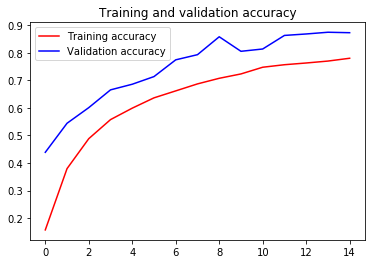

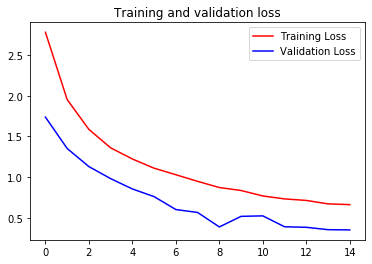

In [37]:
# Plot the chart for accuracy and loss on both training and validation
%matplotlib inline
import matplotlib.pyplot as plt
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'r', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()

plt.plot(epochs, loss, 'r', label='Training Loss')
plt.plot(epochs, val_loss, 'b', label='Validation Loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()